In [1]:
# Performed as a part of curriculum at Great learning
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D,Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mping

In [8]:
# Loading the dataset
!wget https://www.dropbox.com/s/1axwa3bhtr4e369/gender%20detection.zip

--2021-09-28 09:52:57--  https://www.dropbox.com/s/1axwa3bhtr4e369/gender%20detection.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.7.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.7.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/1axwa3bhtr4e369/gender%20detection.zip [following]
--2021-09-28 09:52:58--  https://www.dropbox.com/s/raw/1axwa3bhtr4e369/gender%20detection.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc78d4c2e29d53102dd1e88dee3f.dl.dropboxusercontent.com/cd/0/inline/BXCjgR01nSvdSmuig4C6pCpnIl8bA8Yz9cLrdNZh7cKkEZnBNwqrc9QD0LqWrhIq5hjHWwI8IfQaKOyiwS6q6lTPi8l7Q_v4daKQpW61roiK_CFgJrUyAd5lssz_i5pH_RjLAN80hV0LrYKobC3ljMbV/file# [following]
--2021-09-28 09:52:58--  https://uc78d4c2e29d53102dd1e88dee3f.dl.dropboxusercontent.com/cd/0/inline/BXCjgR01nSvdSmuig4C6pCpnIl8bA8Yz9cLrdNZh7cKkEZnBNwqrc9QD0LqW

In [16]:
!unzip '/content/gender detection.zip'

Archive:  /content/gender detection.zip
   creating: gender_dataset_face/Testing dataset/
   creating: gender_dataset_face/Testing dataset/man/
  inflating: gender_dataset_face/Testing dataset/man/face_1000.jpg  
  inflating: gender_dataset_face/Testing dataset/man/face_1001.jpg  
  inflating: gender_dataset_face/Testing dataset/man/face_1003.jpg  
  inflating: gender_dataset_face/Testing dataset/man/face_1004.jpg  
  inflating: gender_dataset_face/Testing dataset/man/face_1005.jpg  
  inflating: gender_dataset_face/Testing dataset/man/face_1006.jpg  
  inflating: gender_dataset_face/Testing dataset/man/face_1007.jpg  
  inflating: gender_dataset_face/Testing dataset/man/face_1010.jpg  
  inflating: gender_dataset_face/Testing dataset/man/face_1011.jpg  
  inflating: gender_dataset_face/Testing dataset/man/face_1012.jpg  
  inflating: gender_dataset_face/Testing dataset/man/face_1014.jpg  
  inflating: gender_dataset_face/Testing dataset/man/face_1016.jpg  
  inflating: gender_dataset_

In [17]:
img_width,img_height=150,150
train_data_dir=r"/content/gender_dataset_face/Training set"
validation_data_dir=r"/content/gender_dataset_face/Testing dataset"
nb_train_sample=10
nb_validation_sample=10
epochs=5
batch_size=5

In [18]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
  input_shape=(3,img_width,img_height)
else:
  input_shape=(img_width,img_height,3)

In [19]:
train_datagen=ImageDataGenerator(rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
train_generator=train_datagen.flow_from_directory(train_data_dir,target_size=(img_width,img_height),batch_size=batch_size,class_mode='binary',classes=['men','women'])
test_datagen=ImageDataGenerator(rescale=1/255)
validation_generator=test_datagen.flow_from_directory(validation_data_dir,target_size=(img_width,img_height),batch_size=batch_size,class_mode='binary')

Found 1641 images belonging to 2 classes.
Found 666 images belonging to 2 classes.


In [21]:
train_generator.class_indices

{'men': 0, 'women': 1}

In [22]:
validation_generator.class_indices

{'man': 0, 'woman': 1}

In [28]:
t_img,label=train_generator.next()

In [30]:
def PlotImages(img_arr,label):
  for im,l in zip(img_arr,label):
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.show()

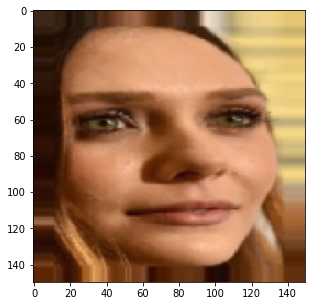

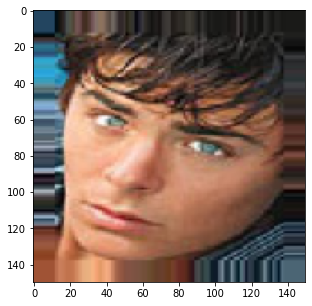

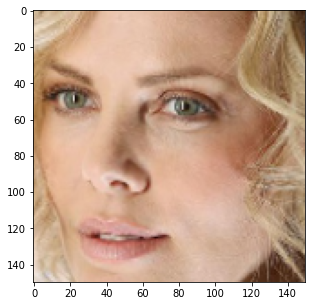

In [31]:
PlotImages(t_img[:3],label[:3])

In [32]:
# Creating and training the model
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [33]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 148, 148, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 350464)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                22429760  
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

In [43]:
history=model.fit(train_generator,steps_per_epoch=nb_train_sample,epochs=50,validation_data=validation_generator,validation_steps=10)

Epoch 1/50
10/10 [==============================] - 4s 367ms/step - loss: 0.6893 - accuracy: 0.6400 - val_loss: 0.6992 - val_accuracy: 0.3200
Epoch 2/50
10/10 [==============================] - 3s 346ms/step - loss: 0.6940 - accuracy: 0.4783 - val_loss: 0.6990 - val_accuracy: 0.3000
Epoch 3/50
10/10 [==============================] - 4s 356ms/step - loss: 0.6896 - accuracy: 0.6200 - val_loss: 0.7007 - val_accuracy: 0.2800
Epoch 4/50
10/10 [==============================] - 4s 352ms/step - loss: 0.6898 - accuracy: 0.6000 - val_loss: 0.6994 - val_accuracy: 0.3400
Epoch 5/50
10/10 [==============================] - 4s 359ms/step - loss: 1.0596 - accuracy: 0.6000 - val_loss: 0.7068 - val_accuracy: 0.2000
Epoch 6/50
10/10 [==============================] - 4s 357ms/step - loss: 0.6907 - accuracy: 0.5600 - val_loss: 0.7027 - val_accuracy: 0.3000
Epoch 7/50
10/10 [==============================] - 4s 356ms/step - loss: 0.6925 - accuracy: 0.5200 - val_loss: 0.7066 - val_accuracy: 0.2200
Epoch 

In [44]:
from tensorflow.keras.preprocessing import image
from google.colab.patches import cv2_imshow
import numpy as np
img=image.load_img('/content/women_1141.jpg',target_size=(150,150))
img_pred=image.img_to_array(img)
img_pred=np.expand_dims(img_pred,axis=0)
result=model.predict(img_pred)
print(result)
prediction=""
if result[0][0]==1:
  prediction="Women"
else:
  prediction="Men"
print('Prediction:',prediction)

[[1.]]
Prediction: Women


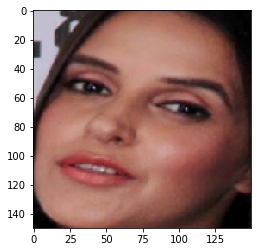

In [45]:
img=image.load_img('/content/women_1141.jpg',target_size=(150,150))
plt.imshow(img)

In [46]:
from tensorflow.keras.preprocessing import image
from google.colab.patches import cv2_imshow
import numpy as np
img=image.load_img('/content/men_959.jpg',target_size=(150,150))
img_pred=image.img_to_array(img)
img_pred=np.expand_dims(img_pred,axis=0)
result=model.predict(img_pred)
print(result)
prediction=""
if result[0][0]==1:
  prediction="Women"
else:
  prediction="Men"
print('Prediction:',prediction)

[[0.]]
Prediction: Men


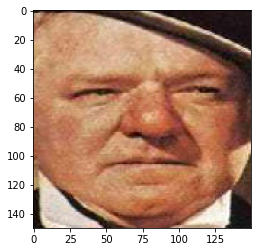

In [47]:
img=image.load_img('/content/men_959.jpg',target_size=(150,150))
plt.imshow(img)

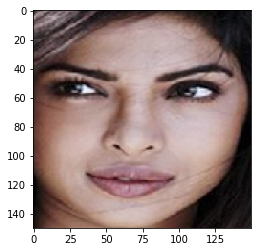

In [48]:
img=image.load_img('/content/women_1140.jpg',target_size=(150,150))
plt.imshow(img)

In [49]:
from tensorflow.keras.preprocessing import image
from google.colab.patches import cv2_imshow
import numpy as np
img=image.load_img('/content/women_1140.jpg',target_size=(150,150))
img_pred=image.img_to_array(img)
img_pred=np.expand_dims(img_pred,axis=0)
result=model.predict(img_pred)
print(result)
prediction=""
if result[0][0]==1:
  prediction="Women"
else:
  prediction="Men"
print('Prediction:',prediction)

[[1.]]
Prediction: Women
